#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import os

In [2]:
from tensorflow.keras.utils import plot_model
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import SVG, Image
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import plotly.express as px

#### Generic Function for Importing Images of the Directories

In [4]:
def plot_images(plt, path, figsize, img_size=48, img_count=6, map="gray"):
    plt.figure(0, figsize=figsize)
    ctr = 0
    for expression in os.listdir(path):
        for i in range(1,img_count):
            ctr += 1
            plt.subplot(7,5,ctr)
            img = load_img(path + expression + "/" +os.listdir(path + expression)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap=map)
            plt.title(expression)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

#### Visualize the Images of Test Data

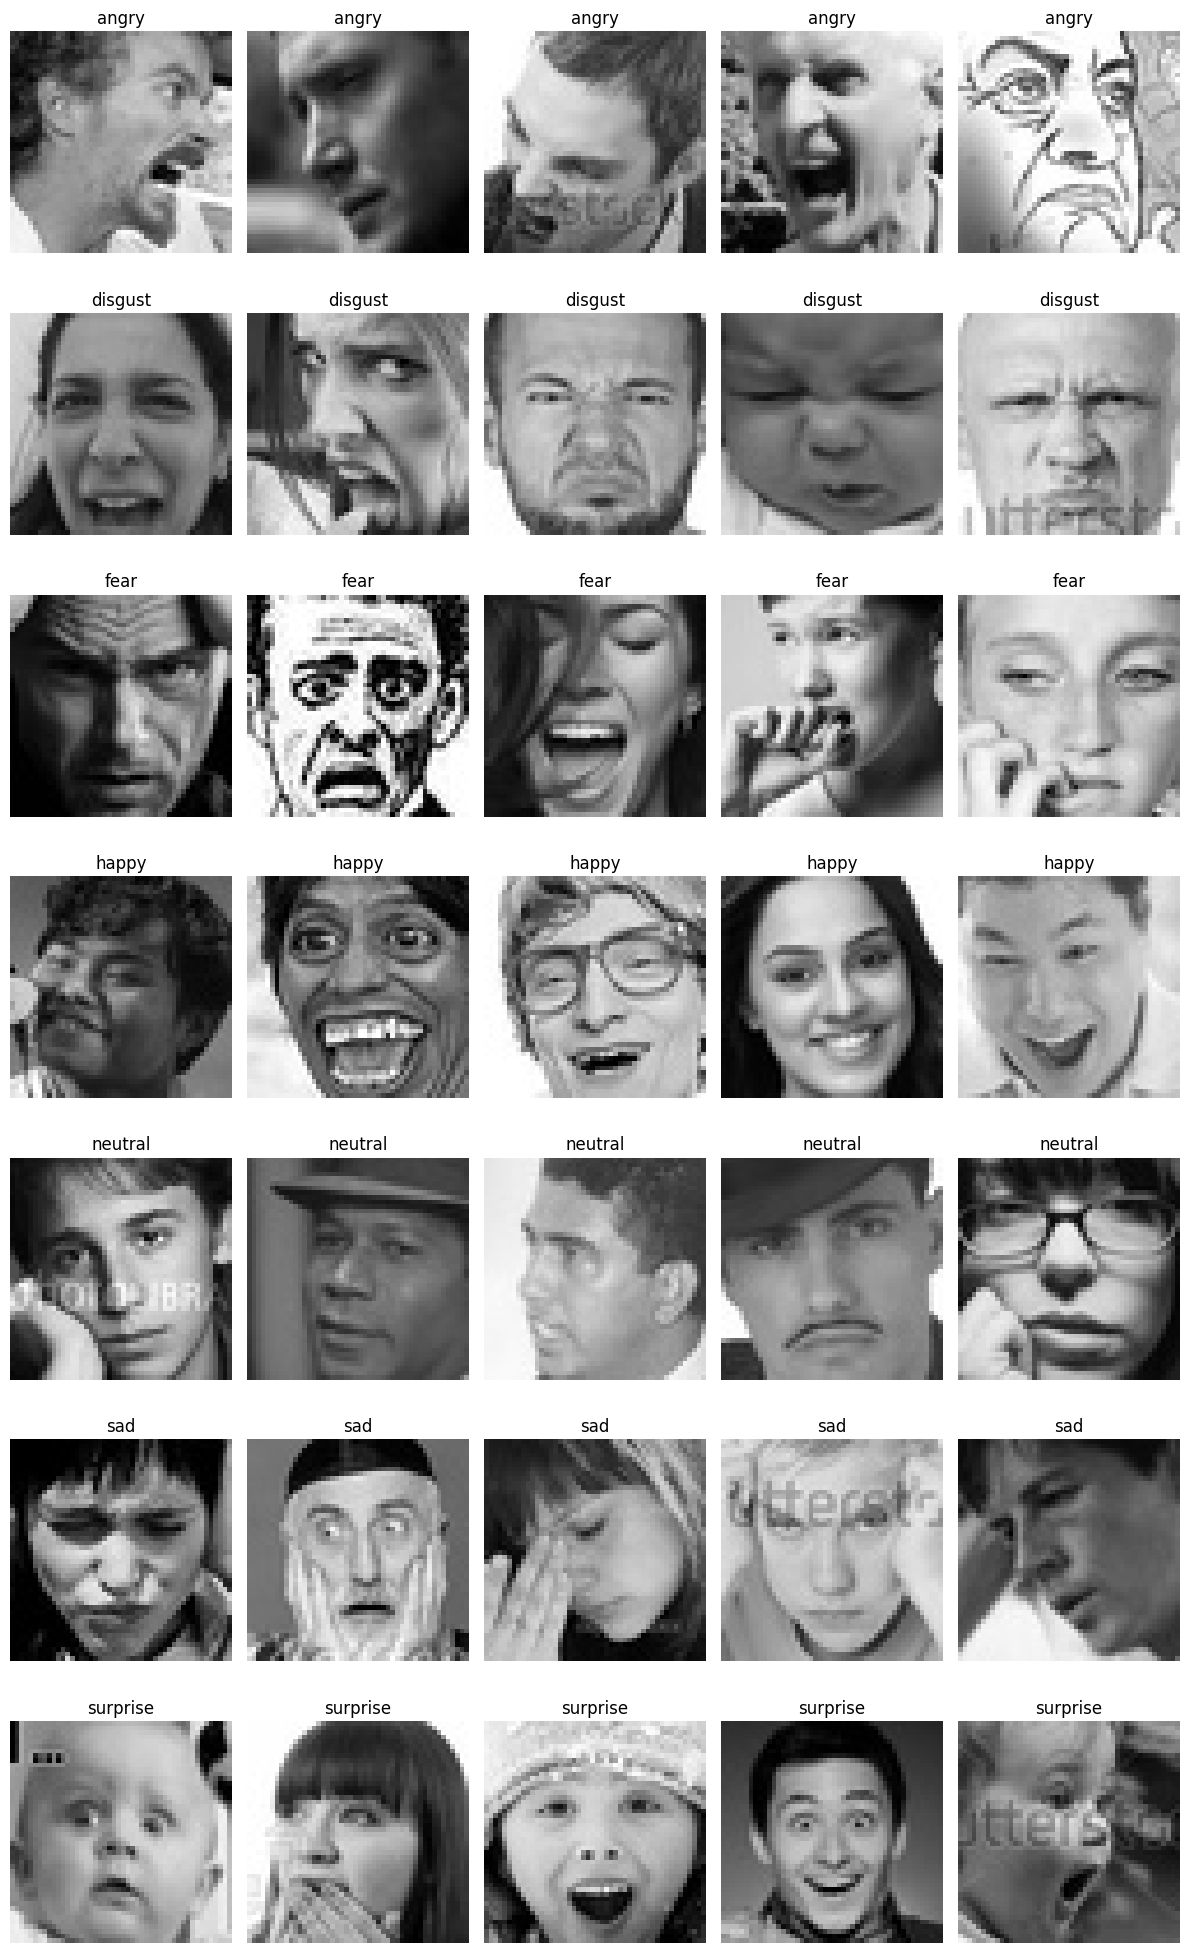

In [5]:
path = os.path.abspath("dataset/test") + "/"
fig = (12, 20)
plot_images(plt,path,fig)

#### Visualize the Images of Training Data

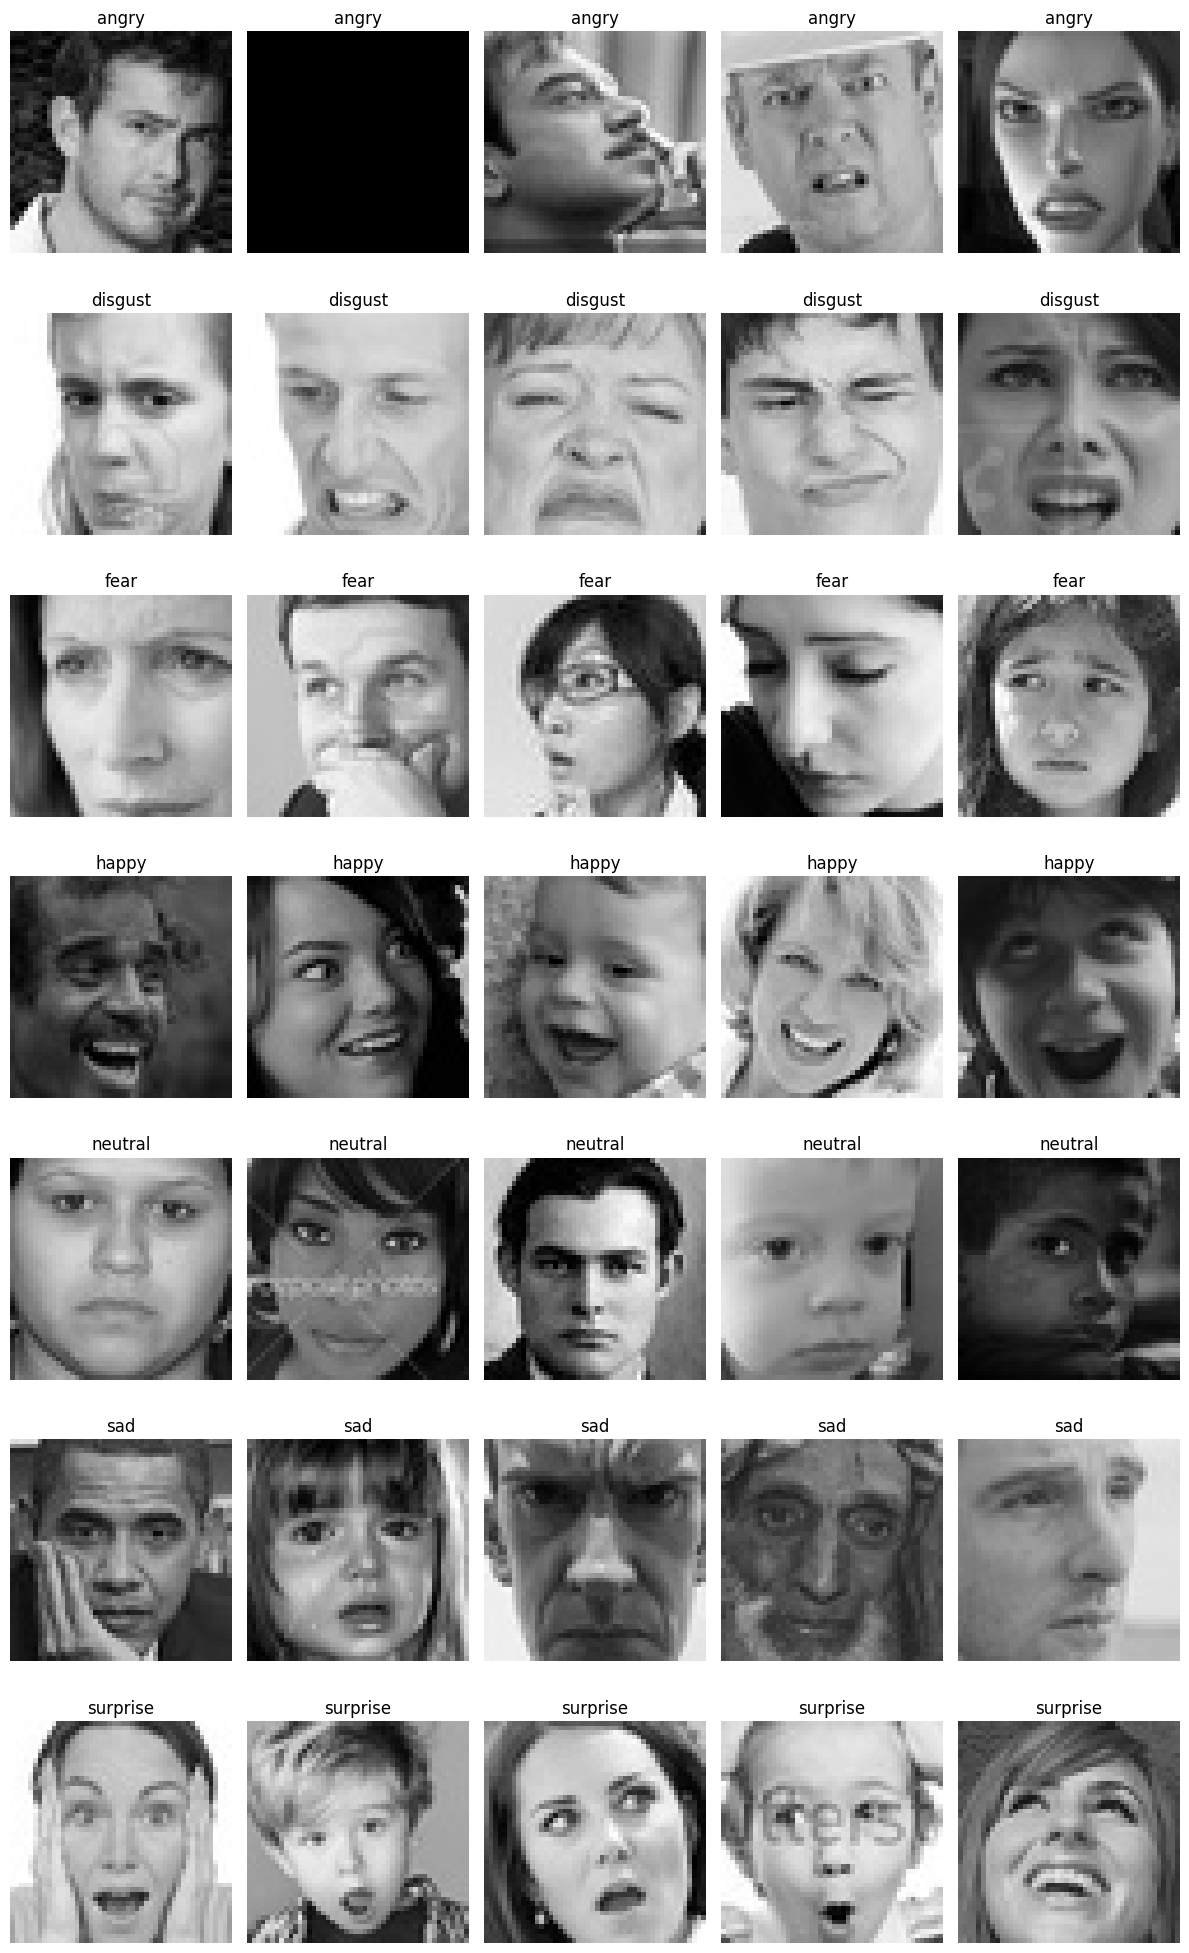

In [6]:
path = os.path.abspath("dataset/train") + "/"
fig = (12, 20)
plot_images(plt,path,fig)

#### Visualize the Number of Images of Training Data

In [53]:
path = os.path.abspath("dataset/train") + '/'
name = [emotion for emotion in os.listdir(path)]
name = np.array(name)
count = [len(os.listdir(path+emotion)) for emotion in os.listdir(path)]
count = np.array(count)
df = pd.DataFrame({'name': name, 'count': count})

In [56]:
fig = px.bar(df, x='name', y='count', labels={'name': 'Number of Emotions', 
'count': 'Number of Images'}, title='Number of Images in each Directory', color='name')
fig.show()

#### Visualize the Number of Images of Test Data

In [57]:
path = os.path.abspath("dataset/test") + '/'
name = [emotion for emotion in os.listdir(path)]
name = np.array(name)
count = [len(os.listdir(path+emotion)) for emotion in os.listdir(path)]
count = np.array(count)
df = pd.DataFrame({'name': name, 'count': count})

In [58]:
fig = px.bar(df, x='name', y='count', labels={'name': 'Number of Emotions', 
'count': 'Number of Images'}, title='Number of Images in each Directory', color='name')
fig.show()

#### Check the Amount of Data in Each Folder in Training Dataset

In [74]:

path = os.path.abspath('dataset/train') + '/'
for expression in os.listdir(path):
    print(expression, ' '*(8-len(expression)), ':  ', len(os.listdir(path+expression)), "images")

angry     :   3995 images
disgust   :   436 images
fear      :   4097 images
happy     :   7215 images
neutral   :   4965 images
sad       :   4830 images
surprise  :   3171 images


#### Check the Amount of Data in Each Folder in Testing Dataset

In [76]:

path = os.path.abspath('dataset/test') + '/'
for expression in os.listdir(path):
    print(expression, ' '*(8-len(expression)), ':  ', len(os.listdir(path+expression)), "images")

angry     :   958 images
disgust   :   111 images
fear      :   1024 images
happy     :   1774 images
neutral   :   1233 images
sad       :   1247 images
surprise  :   831 images


#### Initalize the Image Data Generator with Rescaling

In [117]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_data_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [119]:
train_generator = train_datagen.flow_from_directory(os.path.abspath('dataset/train'),
                                                    target_size = (64, 64),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_data_gen = validation_data_gen.flow_from_directory(os.path.abspath('dataset/train'),
                                                    target_size = (64, 64),
                                                    batch_size = 32,
                                                    class_mode = 'binary')


Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.


In [121]:
class_indices = train_generator.class_indices
class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

#### Fetch all the Images over the Batches of Training Data 

In [112]:
# Store the data in X_train, y_train variables by iterating over the batches
from tqdm import tqdm
train_generator.reset()
X_train, y_train = next(train_generator)
for i in tqdm(range(len(train_generator)-1)): #fetch all images
  img, label = next(train_generator)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

100%|██████████| 897/897 [10:10<00:00,  1.47it/s]

(28709, 64, 64, 3) (28709,)


#### OverSample the Dataset using SMOTE

In [113]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
num_of_images, channels, height, width = X_train.shape
X_train = X_train.reshape(num_of_images, channels*height*width)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [122]:
X_smote.shape, y_smote.shape

((50505, 12288), (50505,))

#### Continue

In [ ]:
# TODO

In [20]:
import dask.array as da

In [21]:
from dask import delayed

In [22]:


# Convert the data generator to a Dask array
X_train = da.from_delayed(delayed(train_generator))
y_train = da.from_delayed(delayed(train_generator.classes))

# Use SMOTE to oversample the minority class
sm = SMOTE(sampling_strategy='auto', random_state=0)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

MemoryError: Unable to allocate 576. KiB for an array with shape (64, 48, 48, 1) and data type float32

In [37]:
# Define batch size
batch_size = 32

# Create an empty list to store the oversampled data
X_train_oversampled, y_train_oversampled = [], []

# Use SMOTE in batches
for X_batch, y_batch in train_generator:
    X_batch_oversampled, y_batch_oversampled = sm.fit_resample(X_batch, y_batch)
    X_train_oversampled.append(X_batch_oversampled)
    y_train_oversampled.append(y_batch_oversampled)

# Concatenate the batches
X_train_oversampled = np.concatenate(X_train_oversampled)
y_train_oversampled = np.concatenate(y_train_oversampled)

ValueError: Found array with dim 4. Estimator expected <= 2.

In [36]:
# Use SMOTE to oversample the minority class
sm = SMOTE(sampling_strategy='auto', random_state=0)
X_train, y_train = sm.fit_resample(train_generator, train_generator.classes)

MemoryError: Unable to allocate 576. KiB for an array with shape (64, 48, 48, 1) and data type float32

In [ ]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=validation_generator)


